In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'C:\Users\Loaner\Downloads\customer_shopping_data.csv\customer_shopping_data.csv')

In [ ]:
df .head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [ ]:
df.columns= df.columns.str.capitalize()

In [ ]:
df.columns

Index(['Invoice_no', 'Customer_id', 'Gender', 'Age', 'Category', 'Quantity',
       'Price', 'Payment_method', 'Invoice_date', 'Shopping_mall'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace("Invoice_date","Date")

In [ ]:
df.columns

Index(['Invoice_no', 'Customer_id', 'Gender', 'Age', 'Category', 'Quantity',
       'Price', 'Payment_method', 'Date', 'Shopping_mall'],
      dtype='object')

In [ ]:
df.dtypes

Invoice_no         object
Customer_id        object
Gender             object
Age                 int64
Category           object
Quantity            int64
Price             float64
Payment_method     object
Date               object
Shopping_mall      object
dtype: object

In [ ]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [ ]:
df.head()

,Invoice_no,Customer_id,Gender,Age,Category,Quantity,Price,Payment_method,Date,Shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [ ]:
df.isnull().sum()

Invoice_no        0
Customer_id       0
Gender            0
Age               0
Category          0
Quantity          0
Price             0
Payment_method    0
Date              0
Shopping_mall     0
dtype: int64

In [ ]:
df.head()

,Invoice_no,Customer_id,Gender,Age,Category,Quantity,Price,Payment_method,Date,Shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice_no      99457 non-null  object        
 1   Customer_id     99457 non-null  object        
 2   Gender          99457 non-null  object        
 3   Age             99457 non-null  int64         
 4   Category        99457 non-null  object        
 5   Quantity        99457 non-null  int64         
 6   Price           99457 non-null  float64       
 7   Payment_method  99457 non-null  object        
 8   Date            99457 non-null  datetime64[ns]
 9   Shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,Age,Quantity,Price,Date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-08 23:30:48.666257152
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-12-02 00:00:00
std,14.990054,1.413025,941.184567,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['Invoice_no', 'Customer_id', 'Gender', 'Age', 'Category', 'Quantity',
       'Price', 'Payment_method', 'Date', 'Shopping_mall'],
      dtype='object')

In [ ]:
category_counts = df['Category'].value_counts()

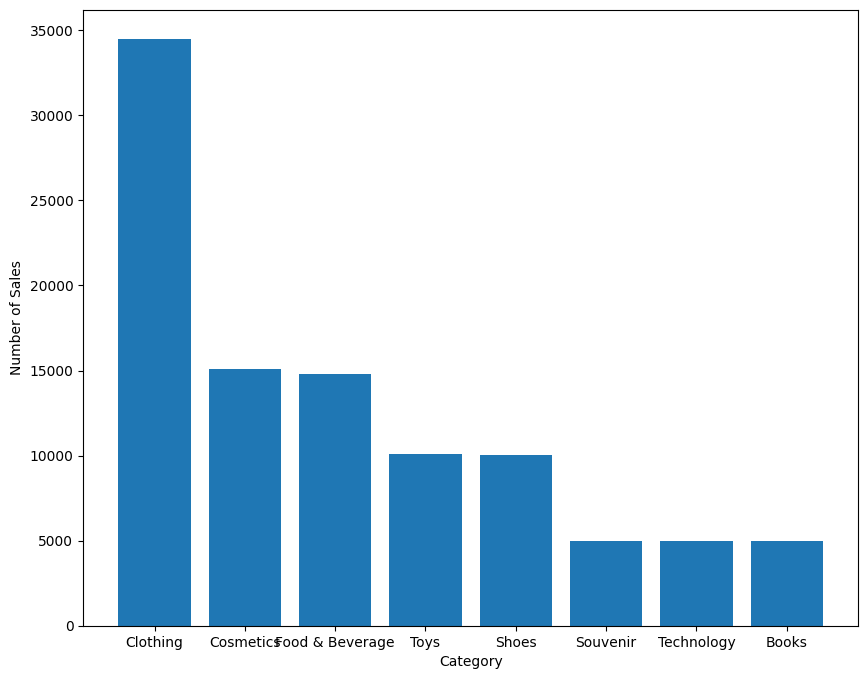

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(category_counts.index,category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:

SalesByProduct = df[['Category','Price','Quantity','Date']]
df= pd.DataFrame(df)
SalesByProduct['Sales_amount']=SalesByProduct['Price'] * SalesByProduct['Quantity']
SalesByProduct['Sales_year']= SalesByProduct['Date'].dt.year
SalesByProduct1 = SalesByProduct.groupby(['Sales_year','Category'],as_index='False').agg(Total_sales= ('Sales_amount',sum))
SalesByProduct1.reset_index(inplace= True)
SalesByProduct1.head()

C:\Users\Loaner\AppData\Local\Temp\ipykernel_24492\2029987090.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  SalesByProduct1 = SalesByProduct.groupby(['Sales_year','Category'],as_index='False').agg(Total_sales= ('Sales_amount',sum))


,Sales_year,Category,Total_sales
0,2021,Books,369008.55
1,2021,Clothing,52604924.24
2,2021,Cosmetics,3033723.92
3,2021,Food & Beverage,390848.36
4,2021,Shoes,30125533.15


<Axes: xlabel='Sales_year', ylabel='Total_sales'>

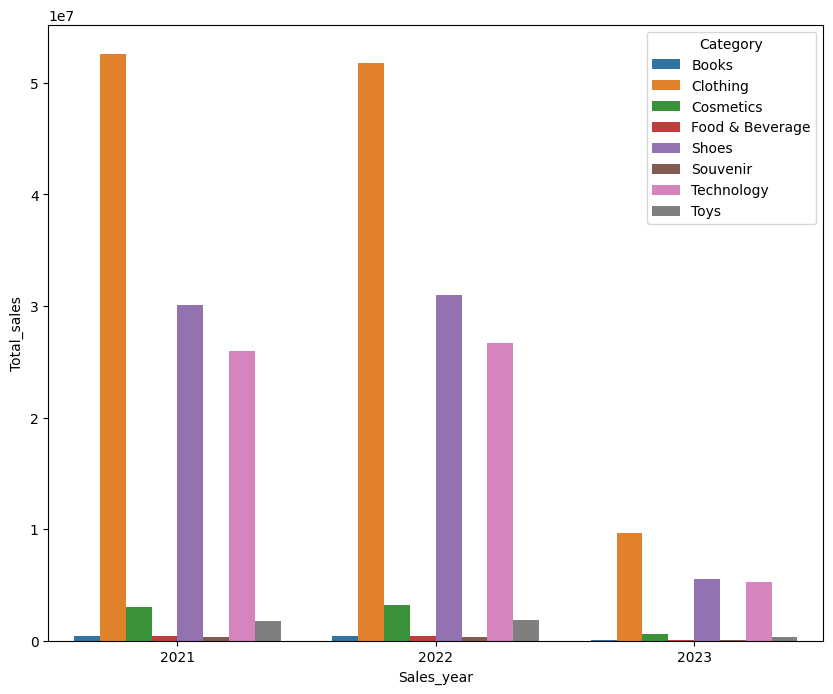

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Sales_year',y= 'Total_sales',hue='Category',data= SalesByProduct1)

In [ ]:
SalesByProduct=df[['Category','Quantity','Price','Date']]
SalesByProduct=pd.DataFrame(df)
SalesByProduct['Sales_year']= SalesByProduct['Date'].dt.year
SalesByProduct['Sales_amount'] = SalesByProduct['Price'] * SalesByProduct['Quantity']
SalesByProductDaily= SalesByProduct.groupby(['Date','Category'],as_index='False').agg(Total_sales= ('Sales_amount',sum),Total_quantity= ('Quantity',sum))
SalesByProductDaily

C:\Users\Loaner\AppData\Local\Temp\ipykernel_24492\2739665793.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  SalesByProductDaily= SalesByProduct.groupby(['Date','Category'],as_index='False').agg(Total_sales= ('Sales_amount',sum),Total_quantity= ('Quantity',sum))
C:\Users\Loaner\AppData\Local\Temp\ipykernel_24492\2739665793.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  SalesByProductDaily= SalesByProduct.groupby(['Date','Category'],as_index='False').agg(Total_sales= ('Sales_amount',sum),Total_quantity= ('Quantity',sum))


Total_sales  Total_quantity
Date       Category                                    
2021-01-01 Books                1257.45              21
           Clothing            84922.64              81
           Cosmetics            7684.74              55
           Food & Beverage       967.55              49
           Shoes              121234.34              50
...                                 ...             ...
2023-12-02 Food & Beverage      1317.96              72
           Shoes              118833.66              54
           Souvenir              903.21              23
           Technology          12600.00               6
           Toys                 2723.84              24

[6371 rows x 2 columns]

In [ ]:
SalesByProductDaily.reset_index(inplace=True)
SalesByProductDaily.head()

,Date,Category,Total_sales,Total_quantity
0,2021-01-01,Books,1257.45,21
1,2021-01-01,Clothing,84922.64,81
2,2021-01-01,Cosmetics,7684.74,55
3,2021-01-01,Food & Beverage,967.55,49
4,2021-01-01,Shoes,121234.34,50


In [ ]:
SalesByProduct1.head()

,Sales_year,Category,Total_sales
0,2021,Books,369008.55
1,2021,Clothing,52604924.24
2,2021,Cosmetics,3033723.92
3,2021,Food & Beverage,390848.36
4,2021,Shoes,30125533.15


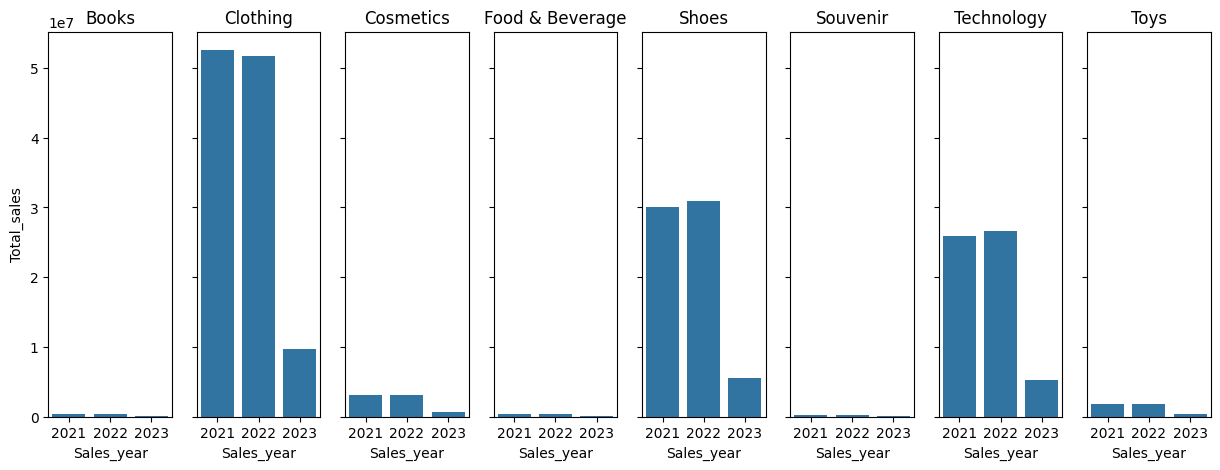

In [ ]:
fig, axes = plt.subplots(1, 8, figsize=(15, 5), sharey=True) 

for i, category in enumerate(SalesByProduct1['Category'].unique()):
    sns.barplot(data=SalesByProduct1[SalesByProduct1['Category'] == category], x='Sales_year', y='Total_sales', ax=axes[i])
    axes[i].set_title(category)

plt.show()

<Axes: xlabel='Sales_year', ylabel='Sales_amount'>

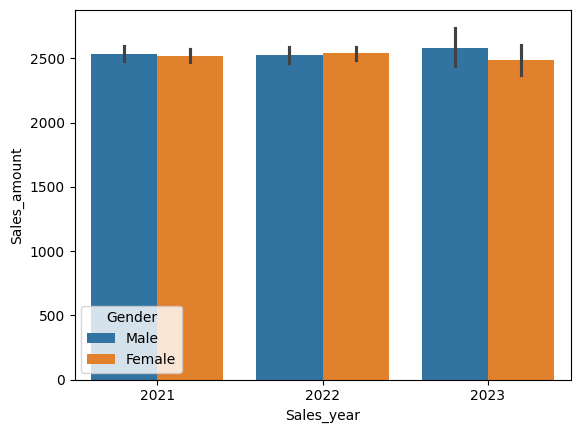

In [ ]:
sns.barplot(x=SalesByProduct['Sales_year'],y=SalesByProduct['Sales_amount'],hue= 'Gender',data=SalesByProduct)

<Axes: xlabel='Category', ylabel='Sales_amount'>

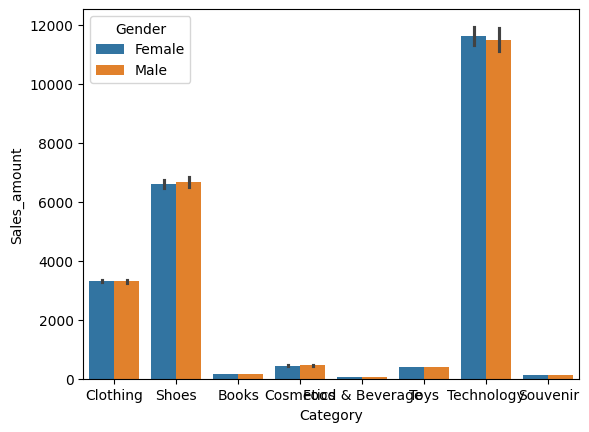

In [ ]:
sns.barplot(x=SalesByProduct['Category'],y=SalesByProduct['Sales_amount'],hue= 'Gender',data=SalesByProduct)

In [ ]:
SalesByProduct.columns

Index(['Invoice_no', 'Customer_id', 'Gender', 'Age', 'Category', 'Quantity',
       'Price', 'Payment_method', 'Date', 'Shopping_mall', 'Sales_year',
       'Sales_amount'],
      dtype='object')

<Axes: xlabel='count', ylabel='Shopping_mall'>

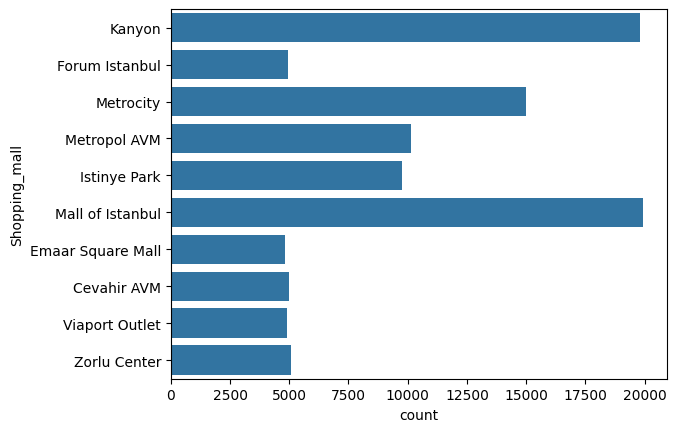

In [ ]:
sns.countplot(SalesByProduct['Shopping_mall'])
#SalesByProduct['Shopping_mall'].value_counts

<Axes: xlabel='count', ylabel='Payment_method'>

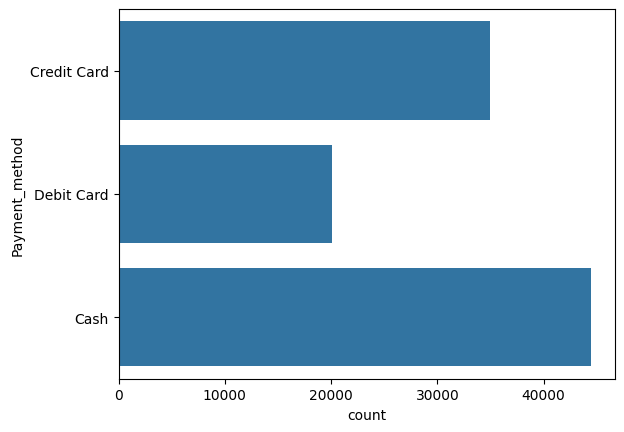

In [ ]:
sns.countplot(SalesByProduct['Payment_method'])

In [ ]:
sns.boxplot(data=SalesByProduct,x='Sales_amount',y='Payment_method')